### Group No: 231

### Group Member Names:
1. ASHIQUE ZZAMAN (2021sc04612)


##### About the dataset :
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.


##### Installing and importing libraries 

In [1]:
# Installing libraries

!pip install opendatasets --user


In [2]:
# Importing libraries

import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    plot_roc_curve,
    accuracy_score,
    confusion_matrix,
    classification_report,
    plot_confusion_matrix,
    plot_precision_recall_curve
)

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Downloading nltk data/models

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashiq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ashiq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ashiq\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ashiq\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### 1. Read and store all positive reviews in a list called ‘pos’ and all negative reviews in a list called ‘neg’. Create a Dataframe with all reviews under column ‘Review’, add a new column ‘class’ assigning label '1' for positive reviews and '0' for negative reviews (1 Marks)

In [4]:
# Storing url to the dataset in a variable

dataset = 'https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data'


In [5]:
# Downloading the dataset

od.download(dataset)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25.7M/25.7M [00:08<00:00, 3.34MB/s]


In [6]:
# Loading the dataset into pandas dataframe

df_imdb = pd.read_csv('./imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')


In [7]:
# Displaying the loaded data

df_imdb


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


##### Statistical analysis performed below where we checking the amount of data present in either of the sentiments

In [8]:
# Checking the percentage of reviews are positive  and negative

df_imdb.sentiment.value_counts()


positive    25000
negative    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

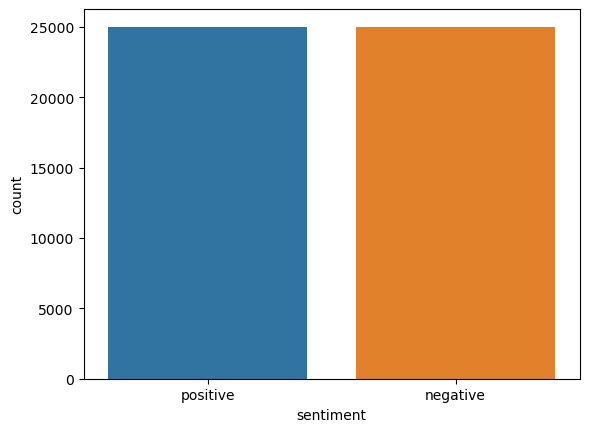

In [9]:
# Ploting distribution for easier understanding

sns.countplot(x = df_imdb['sentiment'])


The dataset is perfectly balanced.

In [10]:
# Checking for any missing values

df_imdb.isna().sum()


review       0
sentiment    0
dtype: int64

There is no missing value in the dataset

##### Storing all positive reviews in a list called ‘pos’ and all negative reviews in a list called ‘neg’

In [11]:
# Storing postive reviews in 'pos' list and negative reviews in 'neg' list

pos = df_imdb['review'].loc[df_imdb['sentiment'] == 'positive'].tolist()
neg = df_imdb['review'].loc[df_imdb['sentiment'] == 'negative'].tolist()


In [12]:
# Printing list count

print(len(pos))
print(len(neg))


25000
25000


In [13]:
# Printing first 3 element from the list 'pos' as sample checking

print("Positive reviews :")
pos[:3]


Positive reviews :


["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [14]:
# Printing first 3 element from the list 'neg' as sample checking

print("Negative reviews :")
neg[:3]


Negative reviews :


["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",
 "This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further t

In [15]:
# Inserting a column class to dataset that represent sentiment as numeric values

df_imdb['class'] = df_imdb['sentiment'].apply(lambda x:1 if x == 'positive' else 0)
df_imdb


,review,sentiment,class
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


##### Inferences :

The following can be inferred from the data -

1. The dataset is balanced.
2. The dataset contains no missing value.
3. The dataset contains equal number of semantics for reviews of both polarity.


### 2. Remove punctuations and stopwords from the text in ‘Review’ column (2 Marks)

#### Cleaning or pre-processing the data is as important as model building if not more and when it comes to text data, this process is of most importance. IMDB reviews are posted by users manually or collected from other sites, so we observe usage of many punctuations and stop words in dataset.

<b>1. Removal Of Punctuations :</b> In this process, we remove the punctuations (!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~) from the text data. This is a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.


<b>2. Removal Of Stop Words :</b> Stopwords are commonly occuring words in a language like 'the', 'a' and so on. These words are considered "stop" words because they do not carry significant meaning on their own and are often used to connect other words in a sentence. Examples of stopwords in English include: "a", "an", "the","and", "or", "but","in","on", "at","is", "was", "were","to", "from", "for".



In [16]:
# Setting English stopwords

stopword_list = nltk.corpus.stopwords.words('english')

# Tokenization of text

tokenizer = ToktokTokenizer()


In [17]:
# Removing punctuations

exclude = string.punctuation

def remove_punc(text):
    text = text.translate(str.maketrans('','',exclude))
    return text


In [18]:
# Removing the stopwords

def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


In [19]:
# Displaying review column from dataframe - before removing punctuations and stopwords

df_imdb['review']


0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [20]:
# Applying functions to the dataframe for removal of punctuations and stopwords

df_imdb['review']=df_imdb['review'].apply(remove_punc)
df_imdb['review']=df_imdb['review'].apply(remove_stopwords)


In [21]:
# Displaying review column from dataframe - after removing punctuations and stopwords

df_imdb['review']


0        One reviewers mentioned watching 1 Oz episode ...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        Basically theres family little boy Jake thinks...
4        Petter Matteis Love Time Money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary schools n...
49998    Im going disagree previous comment side Maltin...
49999    one expects Star Trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

### 3. Normalize Sentence column by using Stemming or Lemmatization. Techniques used without justification will not be awarded marks. (2 Marks)

#### Text normalization :
#### For grammatical reasons, there are going to be different forms of a word being used, such as write, writing and writes. Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

<b>1. Stemming :</b> Stemming means mapping a group of words to the same stem by removing prefixes or suffixes without giving any value to the “grammatical meaning” of the stem formed after the process.

In simple terms, stemming refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes.

<b>2. Lemmatization :</b> Lemmatization also does the same thing as stemming and tries to bring a word to its base form, but unlike stemming it does keep into account the actual meaning of the base word.

In simple terms, Lemmatization refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word

In [22]:
# Displaying review column for a single record from dataframe - before applying text normalization

df_imdb['review'][1]


'wonderful little production br br filming technique unassuming oldtimeBBC fashion gives comforting sometimes discomforting sense realism entire piece br br actors extremely well chosen Michael Sheen got polari voices pat truly see seamless editing guided references Williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life br br realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning Orton Halliwell sets particularly flat Halliwells murals decorating every surface terribly well done'

In [23]:
def sball_stemmer(text):
    ss = SnowballStemmer(language='english')
    text = ' '.join([ss.stem(word) for word in tokenizer.tokenize(text)])
    return text


In [24]:
# Displaying review column for a single record from dataframe - after applying stemming. Also displaying time 

%time sball_stemmer(df_imdb['review'][1])


Wall time: 2 ms


'wonder littl product br br film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done'

In [25]:
def wnet_lemmatization(text):
    wl = WordNetLemmatizer()
    text = ' '.join([wl.lemmatize(word) for word in tokenizer.tokenize(text)])
    return text


In [26]:
# Displaying review column for a single record from dataframe - after applying lemmatization

%time wnet_lemmatization(df_imdb['review'][1])


Wall time: 1.91 s


'wonderful little production br br filming technique unassuming oldtimeBBC fashion give comforting sometimes discomforting sense realism entire piece br br actor extremely well chosen Michael Sheen got polari voice pat truly see seamless editing guided reference Williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life br br realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning Orton Halliwell set particularly flat Halliwells mural decorating every surface terribly well done'

##### Observations : 

1. Lemmatizer taking longer time in comparision to stemming.  
2. Lemmatization giving better accuracy in comparision to stemming.<br> 
For example -<br>
In Stemming :<br>
a. little is converted to littl<br> 
b. entries converted to entri<br>
In lemmatization :<br>
a. little is restored as little<br>
b. entries is converted to entry<br>

##### Technique used and justification :

Looking at the observations above, decided to use lemmatizer for better accuracy. 
Lemmatization does normalizations with the use of a vocabulary and morphological analysis of words and thereby gives better accuracy.

In [27]:
# Applying lemmatization to review column of dataframe

df_imdb['review']=df_imdb['review'].apply(wnet_lemmatization)


In [28]:
# Displaying review column from dataframe - after applying lemmatization

df_imdb['review']


0        One reviewer mentioned watching 1 Oz episode y...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        Basically there family little boy Jake think t...
4        Petter Matteis Love Time Money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    Bad plot bad dialogue bad acting idiotic direc...
49997    Catholic taught parochial elementary school nu...
49998    Im going disagree previous comment side Maltin...
49999    one expects Star Trek movie high art fan expec...
Name: review, Length: 50000, dtype: object

### 4. Create two objects X and y. X will be the ' Review' column of  the above dataframe and y will be the 'class' colum. Create a CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model for classifying the reviews and Display the confusion Matrix (3 Marks)

In [29]:
# Two objects X and y created. X is the ' Review' column of the dataframe and y is the 'class' colum

X = df_imdb['review']

y = df_imdb['class']


Splitting the data for training and testing to check the model performance. Also randomizing the data in case the data includes all positive first and then all negative or some other kind of bias.

Using scikit_learn's train_test_split() for splitting.

In [30]:
# Splitting the data into training and testing sets

xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42, shuffle=True)


##### Count Vectorization : 
This is a simpler vectorization technique which relies on frequency of occurence of a particular term in a document or corpus.

##### Count Vectorization parameters :

Below are the few parameters used -

<b>1. analyzer :</b> The analyzer parameter in CountVectorizer controls how the text is tokenized, or split into individual words. The word analyzer simply splits the text on whitespace, ignoring any punctuation. This is the default behavior for CountVectorizer.

<b>2. token_pattern :</b> The token_pattern parameter in CountVectorizer controls how the text is tokenized, or split into individual words. The default value for token_pattern is r'\w{1,}', which means that any sequence of one or more alphanumeric characters will be considered a token. We set the parameter token_pattern = r'\w+'. The \w+ regular expression matches any sequence of one or more alphanumeric characters, so this will exclude all punctuation from the vocabulary.

<b>3. ngram_range :</b> An n-gram is just a string of n words in a row. E.g. the sentence ‘I am Human’ contains the 2-grams ‘I am’ and ‘am Human’. The sentence is itself a 3-gram. Set the parameter ngram_range = (a,b) where a is the minimum and b is the maximum size of ngrams we want to include in our features. The default ngram_range is (1,1). We set the parameter ngram_range = (1, 3).

<b>4. stop_words :</b> Since CountVectorizer just counts the occurrences of each word in its vocabulary, extremely common words like ‘the’, ‘and’, etc. will become very important features while they add little meaning to the text. Model can often be improved if these words are not taken into account. Stop words are just a list of words we don’t want to use as features. We set the parameter stop_words = 'english' here to use a built-in list. This parameter defaults to None.


In [31]:
# Defining the CountVectorizer

def count_vect(xtrain, xtest):
    ctv = CountVectorizer(analyzer='word',token_pattern=r'\w+',
                ngram_range=(1, 3), stop_words = 'english')

    # Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
    ctv.fit(list(xtrain) + list(xtest))
    xtrain_ctv =  ctv.transform(xtrain) 
    xtest_ctv = ctv.transform(xtest)
    return xtrain_ctv, xtest_ctv


In [32]:
# Calling CountVectorizer module

xtrain_ctv, xtest_ctv = count_vect(xtrain, xtest)


In [33]:
# Defining Multinomial Navies Bayes model

def multi_nb(xtrain_ctv, xtest_ctv, ytrain, ytest):
    mnb = MultinomialNB()
    mnb.fit(xtrain_ctv,ytrain)
    
    pred_mnb=mnb.predict(xtest_ctv)
    score_mnb=accuracy_score(ytest,pred_mnb)
    
    print("Multinomial Naive Bayes Classifier Accuracy :", "{:.2f}%".format(100 * score_mnb))
    
    print("Classification Report:\n")
    print(classification_report(pred_mnb,ytest))
    
    plot_confusion_matrix(mnb, xtest_ctv, ytest,cmap = 'Blues')
    print("Confusion Matrix:\n")
    plt.grid(False)
    
    return mnb


Multinomial Naive Bayes Classifier Accuracy : 88.28%
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      5176
           1       0.87      0.90      0.88      4824

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:



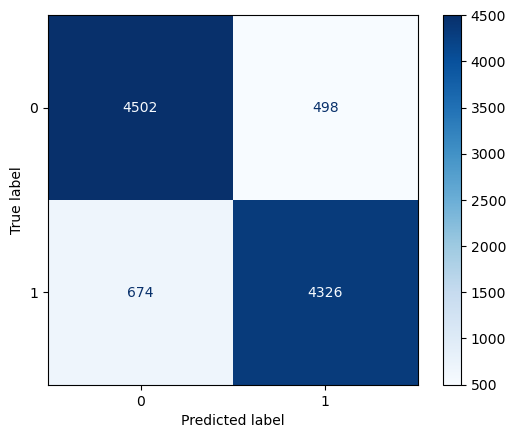

In [34]:
# Calling Multinomial Navies Bayes module

mnb = multi_nb(xtrain_ctv, xtest_ctv, ytrain, ytest)


##### Model result :

#### Accuracy score : 

Accuracy score is 88.28 % for the MultinomialNB model. For each of 100 total number of prediction, in average, our model can predict 88 cases correctly.

#### The Confusion matrix :

<b>True Positive :</b> The actual value was 4502 negative reviews and the model predicted 4502 negative reviews.<br>
<b>True Negative :</b> The actual value was 4326 positive reviews and the model predict 4326 negative reviews.<br>
<b>False Positive :</b> The actual values was 498 postive reviews and the model predicted 498 negative reviews.<br>
<b>False Negative :</b> The actual values was 674 negative reviews and the model preditced 674 positive reviews.<br>

#### Classification report :

<b>Precision :</b>

<b>Negative review :</b> The ratio correctly predicted negative review observations to the total predicted negative review observations is 0.90<br>
<b>Positive review :</b> The ratio correctly predicted positive review observations to the total predicted positive review observations is 0.87<br>

#### Recall :

<b>Negative review :</b> The ratio of correctly predicted negative review observations to the all observations in actual class is 0.87<br>
<b>Positive review :</b> The ratio of correctly predicted positive review observations to the all observations in actual class is 0.90<br>

#### F1 score :

F1 score is the weighted average of Precision and Recall. In both case positive and negative review, F1 scores are equal 0.88


##### ROC AUC

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.


In [35]:
# Defining a module for plotting ROC curve

def mnb_roc_curve(mnb, xtest_ctv, ytest):

    # Predicting probabilities for MNB model: 
    MNB_prob = mnb.predict_proba(xtest_ctv)

    # ROC curve for model
    fpr2, tpr2, thresh2 = roc_curve(ytest, MNB_prob[:,1], pos_label=1)

    # ROC curve for tpr = fpr 
    random_probs = [0 for i in range(len(ytest))]
    p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

    # AUC scores
    auc_MNB = roc_auc_score(ytest, MNB_prob[:,1])
    print("AUC Score: ", auc_MNB)

    # Plotting ROC curves
    plt.plot(fpr2, tpr2, linestyle='--', color='green', label='MNB Model')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

    # Assigning title
    plt.title('ROC curve')
    
    # Assigning x label
    plt.xlabel('False Positive Rate')
    
    # Assigning y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();


AUC Score:  0.9438462799999998


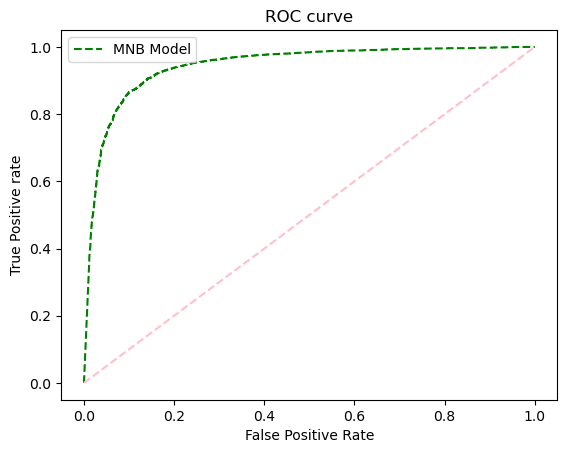

In [36]:
# Calling module for plotting ROC curve

mnb_roc_curve(mnb, xtest_ctv, ytest)


##### Inferences :

The following can be inferred from the ROC AUC -
1. ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.
2. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job.

### 5. Display the HMM POS tagging on the first 4 rows of ‘post’ (2 Marks)

In [37]:
"""
CC     coordinating conjunction
CD     cardinal digit
DT     determiner
EX     existential there (like: "there is" ... think of it like "there exists")
FW     foreign word
IN     preposition/subordinating conjunction
JJ     adjective 'big'
JJR    adjective, comparative 'bigger'
JJS    adjective, superlative 'biggest'
LS     list marker 1)
MD     modal could, will
NN     noun, singular 'desk'
NNS    noun plural 'desks'
NNP    proper noun, singular 'Harrison'
NNPS   proper noun, plural 'Americans'
PDT    predeterminer 'all the kids'
POS    possessive ending parent's
PRP    personal pronoun I, he, she
PRP$   possessive pronoun my, his, hers
RB     adverb very, silently,
RBR    adverb, comparative better
RBS    adverb, superlative best
RP     particle give up
TO     to go 'to' the store.
UH     interjection errrrrrrrm
VB     verb, base form take
VBD    verb, past tense took
VBG    verb, gerund/present participle taking
VBN    verb, past participle taken
VBP    verb, sing. present, non-3d take
VBZ    verb, 3rd person sing. present takes
WDT    wh-determiner which
WP     wh-pronoun who, what
WP$    possessive wh-pronoun whose
WRB    wh-abverb where, when
"""

'\nCC     coordinating conjunction\nCD     cardinal digit\nDT     determiner\nEX     existential there (like: "there is" ... think of it like "there exists")\nFW     foreign word\nIN     preposition/subordinating conjunction\nJJ     adjective \'big\'\nJJR    adjective, comparative \'bigger\'\nJJS    adjective, superlative \'biggest\'\nLS     list marker 1)\nMD     modal could, will\nNN     noun, singular \'desk\'\nNNS    noun plural \'desks\'\nNNP    proper noun, singular \'Harrison\'\nNNPS   proper noun, plural \'Americans\'\nPDT    predeterminer \'all the kids\'\nPOS    possessive ending parent\'s\nPRP    personal pronoun I, he, she\nPRP$   possessive pronoun my, his, hers\nRB     adverb very, silently,\nRBR    adverb, comparative better\nRBS    adverb, superlative best\nRP     particle give up\nTO     to go \'to\' the store.\nUH     interjection errrrrrrrm\nVB     verb, base form take\nVBD    verb, past tense took\nVBG    verb, gerund/present participle taking\nVBN    verb, past par

##### POS tagging

In [38]:
# Tokenizing the first 4 rows of the dataset

tokenized_sentences = [nltk.word_tokenize(text) for text in df_imdb['review'][:4]]

# Performing POS tagging

tagged_data = [nltk.pos_tag(tokens)[:20] for tokens in tokenized_sentences]

print(tagged_data)


[[('One', 'CD'), ('reviewer', 'NN'), ('mentioned', 'VBD'), ('watching', 'VBG'), ('1', 'CD'), ('Oz', 'NNP'), ('episode', 'NN'), ('youll', 'NN'), ('hooked', 'VBD'), ('right', 'RB'), ('exactly', 'RB'), ('happened', 'VBN'), ('mebr', 'NN'), ('br', 'NN'), ('first', 'JJ'), ('thing', 'NN'), ('struck', 'VBD'), ('Oz', 'NNP'), ('brutality', 'NN'), ('unflinching', 'VBG')], [('wonderful', 'JJ'), ('little', 'JJ'), ('production', 'NN'), ('br', 'NN'), ('br', 'IN'), ('filming', 'VBG'), ('technique', 'NN'), ('unassuming', 'JJ'), ('oldtimeBBC', 'JJ'), ('fashion', 'NN'), ('give', 'VB'), ('comforting', 'NN'), ('sometimes', 'RB'), ('discomforting', 'VBG'), ('sense', 'NN'), ('realism', 'NN'), ('entire', 'JJ'), ('piece', 'NN'), ('br', 'NN'), ('br', 'NN')], [('thought', 'VBN'), ('wonderful', 'JJ'), ('way', 'NN'), ('spend', 'JJ'), ('time', 'NN'), ('hot', 'JJ'), ('summer', 'NN'), ('weekend', 'NN'), ('sitting', 'VBG'), ('air', 'NN'), ('conditioned', 'VBN'), ('theater', 'NN'), ('watching', 'VBG'), ('lighthearted',

In [39]:
# Defining a module for plotting POS tagging

def plot_pos_tag(tagged_data):

    # Extracting tags and words from the tagged data

    tags = []
    words = []

    for tagged_sentence in tagged_data:
        for word, tag in tagged_sentence:
            tags.append(tag)
            words.append(word)

    # Plotting the POS tagging

    plt.figure(figsize=(10, 16))  # Increase figure size
    plt.scatter(range(len(words)), tags, marker='o')

    # Adding labels to the points

    for i, word in enumerate(words):
        plt.annotate(word, (i, tags[i]), textcoords="offset points", xytext=(0, 10), ha='center', rotation='vertical', fontsize=10)  # Make text vertical

    # Setting plot properties

    plt.xlabel('Word Index', fontsize=12)  
    plt.ylabel('POS Tag', fontsize=12) 
    plt.title('HMM POS Tagging', fontsize=14) 

    # Adjusting spacing between plot elements
    plt.tight_layout()  

    plt.show()

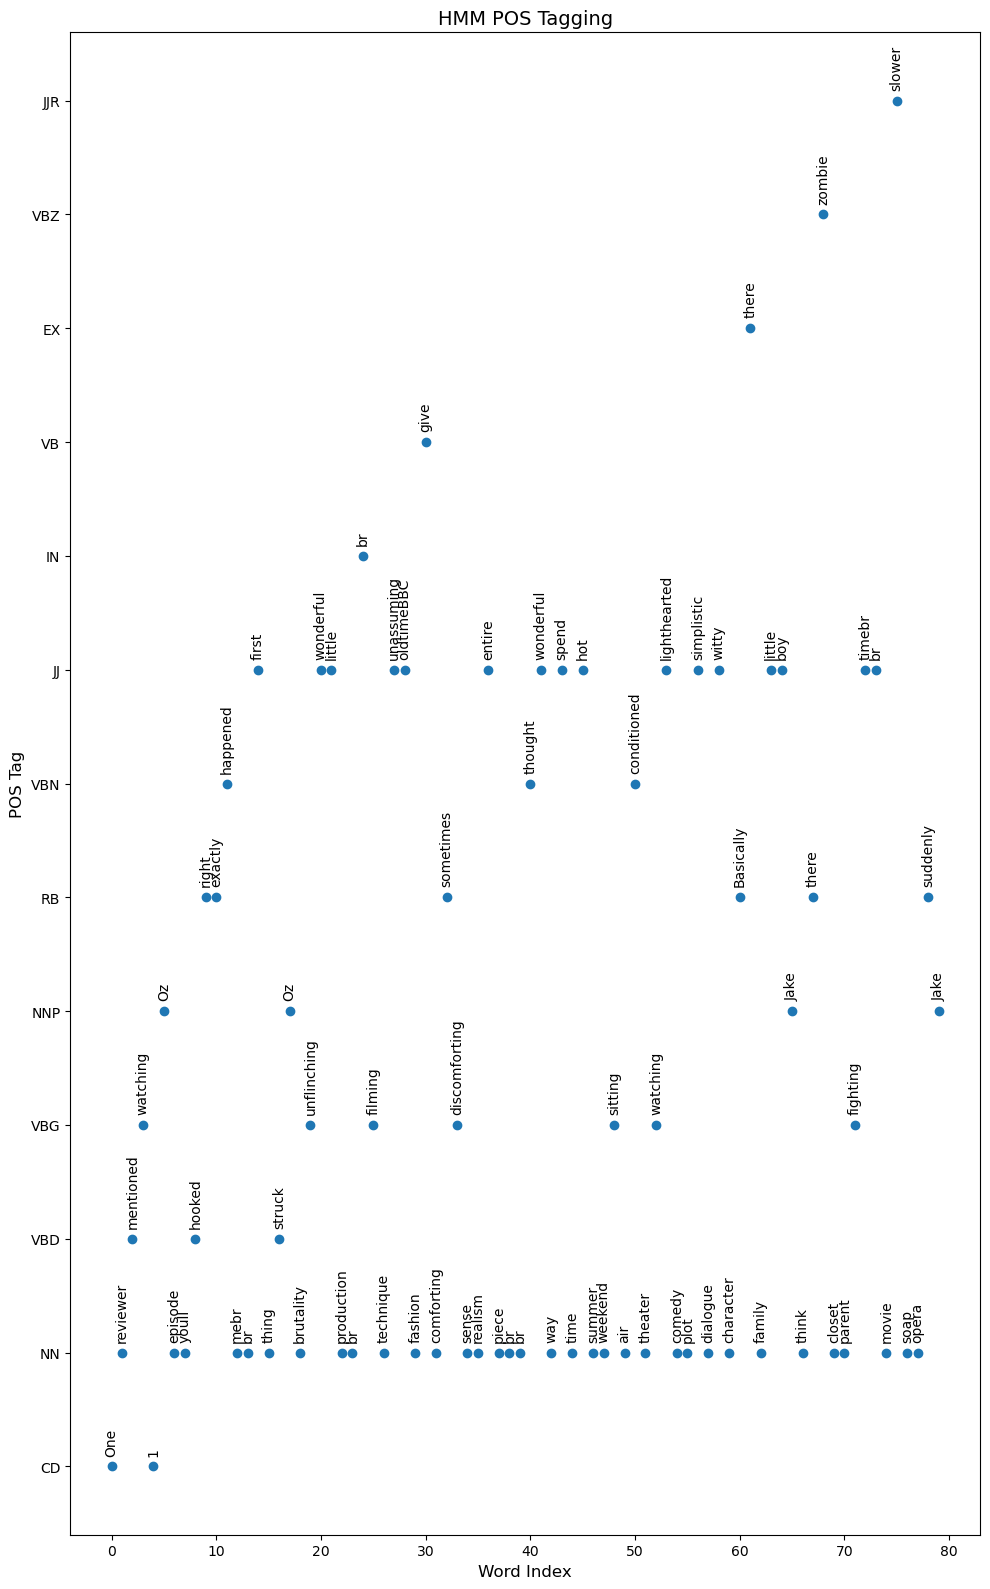

In [40]:
# Calling module for plotting Transition Probability

plot_pos_tag(tagged_data)


In [41]:
# Creating list of tagged words

tagged_words = [ tup for sent in tagged_data for tup in sent ]


In [42]:
# Using set datatype to check how many unique tags are present in training data

tags = {tag for word,tag in tagged_words}
print(len(tags))
print(tags)
 
# Checking total words in vocabulary

vocab = {word for word,tag in tagged_words}
print(vocab)


13
{'EX', 'NNP', 'VBN', 'VBD', 'VBZ', 'RB', 'IN', 'JJR', 'VB', 'CD', 'NN', 'JJ', 'VBG'}
{'technique', 'struck', 'thing', 'reviewer', 'opera', 'way', 'episode', 'unflinching', 'piece', 'hooked', 'discomforting', 'comforting', 'thought', 'Basically', 'parent', 'suddenly', 'exactly', 'sense', 'boy', 'summer', 'dialogue', 'hot', 'weekend', 'there', 'fashion', 'timebr', 'filming', 'closet', 'Oz', 'production', 'unassuming', 'comedy', 'soap', 'One', 'sometimes', 'time', 'br', 'family', 'witty', 'wonderful', 'air', 'zombie', '1', 'brutality', 'spend', 'little', 'give', 'Jake', 'fighting', 'entire', 'movie', 'youll', 'mentioned', 'slower', 'character', 'first', 'happened', 'conditioned', 'lighthearted', 'theater', 'watching', 'plot', 'right', 'sitting', 'simplistic', 'mebr', 'oldtimeBBC', 'realism', 'think'}


##### Emission probability

In [43]:
# Computing Emission probability

def emi_prob(tagged_data):

    # Create a dictionary to store emission counts
    emission_counts = {}

    # Count the occurrences of each (word, tag) pair
    for tagged_sentence in tagged_data:
        for word, tag in tagged_sentence:
            if tag not in emission_counts:
                emission_counts[tag] = {}
            if word not in emission_counts[tag]:
                emission_counts[tag][word] = 0
            emission_counts[tag][word] += 1

    # Compute emission probabilities
    emission_probabilities = {}
    for tag, word_counts in emission_counts.items():
        total_count = sum(word_counts.values())
        emission_probabilities[tag] = {word: count / total_count for word, count in word_counts.items()}
        
    return emission_probabilities

In [44]:
# Calling module for computing Emission probability

emission_probabilities = emi_prob(tagged_data)


In [45]:
# Defining a module to create emission matrix of tags, words

def emi_matx(emission_probabilities):
    tags = list(emission_probabilities.keys())
    words = list(set().union(*[list(probabilities.keys()) for probabilities in emission_probabilities.values()]))
    emi_matrix = np.zeros((len(tags), len(words)))

    for i, tag in enumerate(tags):
        for j, word in enumerate(words):
            if word in emission_probabilities[tag]:
                emi_matrix[i, j] = emission_probabilities[tag][word]
                
    return tags, words, emi_matrix 


In [46]:
# Calling module tocreate emission matrix of tags, words

tags, words, emi_matrix = emi_matx(emission_probabilities)


In [47]:
# Defining a module for plotting emission probability

def plot_emi_matx(tags, words, emi_matrix):
    plt.figure(figsize=(10, 6))
    plt.imshow(emi_matrix, cmap='Spectral', interpolation='nearest', aspect='auto')

    plt.xticks(np.arange(len(words)), words, rotation=90)
    plt.yticks(np.arange(len(tags)), tags)

    cbar = plt.colorbar()
    cbar.set_label('Emission Probability')

    plt.title('HMM Emission Probabilities')
    plt.tight_layout()
    plt.show()


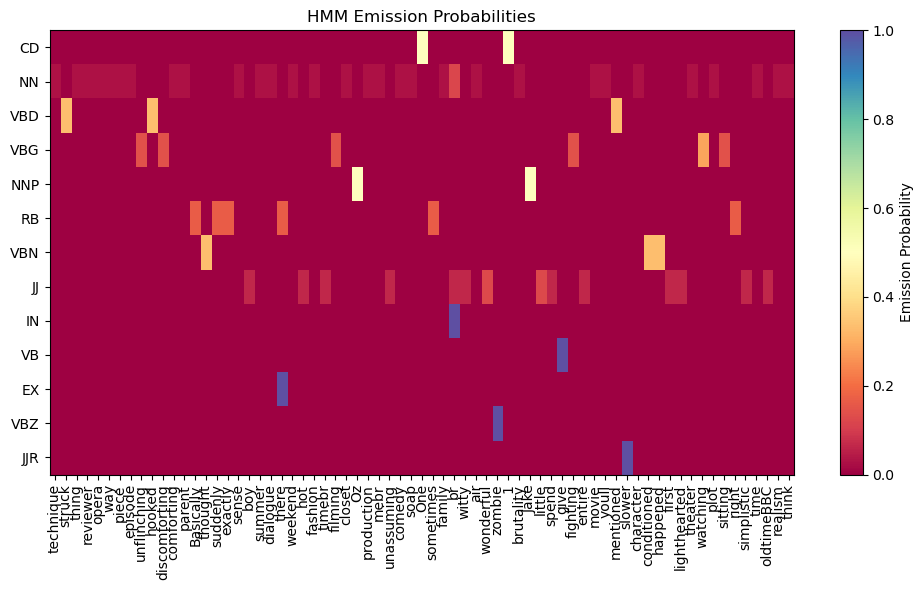

In [48]:
# Calling module for plotting emission probability

plot_emi_matx(tags, words, emi_matrix)


In [49]:
# Converting the matrix to a dataframe for better readability

emi_df = pd.DataFrame(emi_matrix, columns = list(words), index=list(tags))
display(emi_df)


,technique,struck,thing,reviewer,opera,way,piece,episode,unflinching,hooked,...,theater,watching,plot,sitting,right,simplistic,time,oldtimeBBC,realism,think
CD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000
NN,0.029412,0.000000,0.029412,0.029412,0.029412,0.029412,0.029412,0.029412,0.000000,0.000000,...,0.029412,0.000000,0.029412,0.000000,0.000000,0.0000,0.029412,0.0000,0.029412,0.029412
VBD,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000
VBG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,...,0.000000,0.285714,0.000000,0.142857,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000
NNP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000
RB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.166667,0.0000,0.000000,0.0000,0.000000,0.000000
VBN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000
JJ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.0625,0.000000,0.000000
IN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000
VB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000


##### Transition probability

In [50]:
# Computing Transition probability

def trans_prob(t2, t1, train_bag = tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1

    return (count_t2_t1, count_t1)


In [51]:
# Defining a module to create transition matrix of tags

def trans_matx(tags):
    tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
    for i, t1 in enumerate(list(tags)):
        for j, t2 in enumerate(list(tags)): 
            tags_matrix[i, j] = trans_prob(t2, t1)[0]/trans_prob(t2, t1)[1]
    
    return tags_matrix


In [52]:
# Calling module to create t x t transition matrix of tags, t = no of tags

tags_matrix = trans_matx(tags)


In [53]:
# Defining a module for plotting transition probability

def plot_trans_matx(tags_matrix, tags):
    plt.figure(figsize=(10, 6))
    plt.imshow(tags_matrix, cmap='Spectral', interpolation='nearest', aspect='auto')

    plt.xticks(np.arange(len(tags)), tags, rotation=90)
    plt.yticks(np.arange(len(tags)), tags)

    cbar = plt.colorbar()
    cbar.set_label('Transition Probability')

    plt.title('HMM Transition Probabilities')
    plt.tight_layout()
    plt.show()

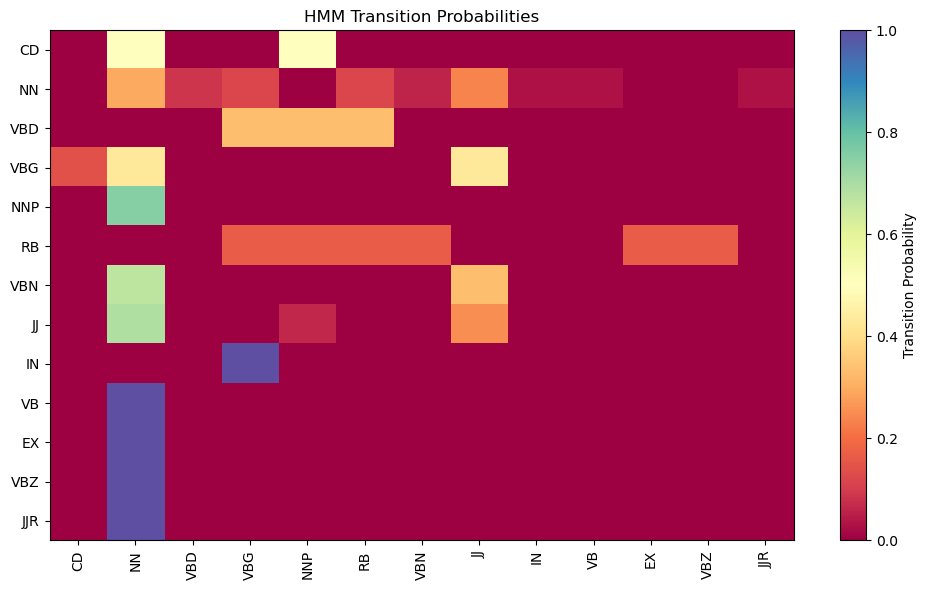

In [54]:
# Calling module for plotting transition probability

plot_trans_matx(tags_matrix, tags)


In [55]:
# Converting the matrix to a dataframe for better readability

trans_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(trans_df)


,CD,NN,VBD,VBG,NNP,RB,VBN,JJ,IN,VB,EX,VBZ,JJR
CD,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NN,0.000000,0.294118,0.088235,0.117647,0.000000,0.117647,0.058824,0.235294,0.029412,0.029412,0.000000,0.000000,0.029412
VBD,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VBG,0.142857,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000
NNP,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RB,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,0.000000,0.166667,0.166667,0.000000
VBN,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
JJ,0.000000,0.687500,0.000000,0.000000,0.062500,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
IN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VB,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


##### Summary and conclusion :

1. Loaded the imdb dataset into pandas dataframe
2. Performed statistical analysis and distribution plotting of the sentiment column of the dataset
3. Storing postive and negative reviews in 'pos' and 'neg' list respectively
4. Added a label column - class to dataset that represent sentiment as numeric values
5. Performed suggested data cleaning steps (removal of punctuations and stopwords)
6. Performed text normalization by using both stemming and lemmatization for comparision and further chose lemmatization because of better accuracy
7. Created two objects X ('review') and y ('class') and splitted the data into training and testing sets. Created a CountVectorizer object trained a MultinomialNB model for classifying the reviews 
8. Displayed the confusion matrix, classification report and roc curve
9. Displayed the POS tagging, HMM Emission Probabilities and HMM Transition Probabilities

So overall we are getting better performance as evident from accuracy score of the model and ROC AUC curve.